In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import sklearn
import matplotlib.pyplot as plt

In [2]:
df_all = pd.read_pickle('data.pkl.gz', compression='gzip')

In [3]:
df_all

,pr,rev_intervals_ccnt,rev_pld_max,dst_port,num_pkts_in,pld_ccnt,rev_hdr_ccnt,rev_pld_ccnt,hdr_mean,rev_hdr_bin_40,...,dns_answer_ip,http_uri,http_content_type,http_content_len,http_host,http_code,http_method,label_top,label_mid,label_fine
id,,,,,,,,,,,,,,,,,,,,,
8128279,17,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]",0,5355,0,"[2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]",8.00,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,chat,aim,aim_chat
1060911,6,"[0, 0, 0, 0, 0, 0, 0, 12, 0, 0, 0, 0, 0, 0, 0, 0]",0,443,13,"[13, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]","[0, 13, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]","[13, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]",20.00,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,chat,aim,aim_chat
8338242,17,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]",0,5355,0,"[2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]",8.00,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,chat,aim,aim_chat
8067075,6,"[0, 0, 0, 0, 0, 0, 0, 12, 0, 0, 0, 0, 0, 0, 0, 0]",0,443,13,"[13, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]","[0, 13, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]","[13, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]",20.00,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,chat,aim,aim_chat
3497215,6,"[12, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]",1350,13000,13,"[7, 0, 1, 0, 1, 0, 2, 1, 0, 0, 0, 0, 0, 0, 0, 5]","[0, 12, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0]","[5, 0, 0, 1, 1, 1, 2, 0, 0, 0, 0, 0, 0, 0, 0, 3]",20.71,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,chat,aim,aim_chat
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2474371,17,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]",379,53,1,"[1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]","[1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]","[0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]",8.00,0,...,"[, 173.194.123.104, 173.194.123.105, 173.194.1...",NaN,NaN,NaN,NaN,NaN,NaN,video,youtube,youtube
6706471,17,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]",246,53,1,"[1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]","[1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]","[0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]",8.00,0,...,"[, 199.212.24.175]",NaN,NaN,NaN,NaN,NaN,NaN,video,youtube,youtube
654351,17,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]",219,53,1,"[1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]","[1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]","[0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]",8.00,0,...,"[, 216.58.219.238]",NaN,NaN,NaN,NaN,NaN,NaN,video,youtube,youtube


In [4]:
all_columns = df_all.columns
label_columns = ["label_top", "label_mid", "label_fine"]
feature_columns = list(set(all_columns) - set(label_columns))

df_labels = df_all[label_columns]
df_features = df_all[feature_columns]

# Remove columns that have no or few information

In [5]:
# Count number of rows that contain NaN values per column
df_isna_col = pd.DataFrame({"column": df_features.columns, "isna": df_features.isna().sum(axis=0)})
df_isna_col

,column,isna
http_method,http_method,130517
da,da,0
tls_svr_ext_types,tls_svr_ext_types,129800
rev_hdr_ccnt,rev_hdr_ccnt,0
hdr_distinct,hdr_distinct,0
...,...,...
rev_pld_var,rev_pld_var,0
ack_psh_rst_syn_fin_cnt,ack_psh_rst_syn_fin_cnt,0
time_length,time_length,0
rev_hdr_distinct,rev_hdr_distinct,0


In [6]:
# Show all columns that have more than 1e5 missing values
df_isna_col[df_isna_col["isna"] > 1e5]

,column,isna
http_method,http_method,130517
tls_svr_ext_types,tls_svr_ext_types,129800
tls_svr_key_exchange_len,tls_svr_key_exchange_len,129800
tls_cs,tls_cs,129803
tls_svr_ext_cnt,tls_svr_ext_cnt,129800
tls_ext_types,tls_ext_types,129803
dns_query_class,dns_query_class,122886
dns_answer_cnt,dns_answer_cnt,123374
tls_svr_cnt,tls_svr_cnt,129800
http_uri,http_uri,130517


In [7]:
# Show all columns that have less than 1e5 missing values
df_isna_col[df_isna_col["isna"] < 10000]

,column,isna
da,da,0
rev_hdr_ccnt,rev_hdr_ccnt,0
hdr_distinct,hdr_distinct,0
rev_hdr_bin_40,rev_hdr_bin_40,0
rev_pld_distinct,rev_pld_distinct,0
pld_ccnt,pld_ccnt,0
num_pkts_in,num_pkts_in,0
pld_mean,pld_mean,0
pld_bin_inf,pld_bin_inf,0
num_pkts_out,num_pkts_out,0


This is really great. The columns either have no missing values or they doesn't contain any information. We just need to remove the columns without information.

In [8]:
# Remove columns with NaN values
non_nan_columns = list(df_isna_col[df_isna_col["isna"] < 10000]["column"])
df_non_nan_features = df_features[non_nan_columns]

In [9]:
# Display the resulting DataFrame
pd.set_option('display.max_columns', None)
df_non_nan_features

,da,rev_hdr_ccnt,hdr_distinct,rev_hdr_bin_40,rev_pld_distinct,pld_ccnt,num_pkts_in,pld_mean,pld_bin_inf,num_pkts_out,pld_max,rev_ack_psh_rst_syn_fin_cnt,pr,hdr_bin_40,rev_pld_bin_128,bytes_in,rev_pld_mean,dst_port,intervals_ccnt,hdr_mean,src_port,rev_pld_ccnt,rev_pld_max,sa,bytes_out,pld_median,pld_distinct,hdr_ccnt,rev_pld_var,ack_psh_rst_syn_fin_cnt,time_length,rev_hdr_distinct,rev_intervals_ccnt
id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
8128279,IP_masked,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]",1,0,0,"[2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]",0,22.00,0,2,22,"[0, 0, 0, 0, 0]",17,0,0,0,0.00,5355,"[1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]",8.00,50028,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]",0,IP_masked,44,22,1,"[2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]",0.00,"[0, 0, 0, 0, 0]",0.412089,0,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]"
1060911,IP_masked,"[0, 13, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]",1,0,1,"[13, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]",13,6.00,0,13,6,"[13, 0, 0, 0, 0]",6,0,13,0,0.00,443,"[0, 0, 0, 0, 0, 0, 0, 12, 0, 0, 0, 0, 0, 0, 0, 0]",20.00,13404,"[13, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]",0,IP_masked,78,6,1,"[0, 13, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]",0.00,"[13, 13, 0, 0, 0]",360.001580,1,"[0, 0, 0, 0, 0, 0, 0, 12, 0, 0, 0, 0, 0, 0, 0, 0]"
8338242,IP_masked,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]",1,0,0,"[2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]",0,22.00,0,2,22,"[0, 0, 0, 0, 0]",17,0,0,0,0.00,5355,"[1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]",8.00,59764,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]",0,IP_masked,44,22,1,"[2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]",0.00,"[0, 0, 0, 0, 0]",0.411696,0,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]"
8067075,IP_masked,"[0, 13, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]",1,0,1,"[13, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]",13,6.00,0,13,6,"[13, 0, 0, 0, 0]",6,0,13,0,0.00,443,"[0, 0, 0, 0, 0, 0, 0, 12, 0, 0, 0, 0, 0, 0, 0, 0]",20.00,13397,"[13, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]",0,IP_masked,78,6,1,"[0, 13, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]",0.00,"[13, 13, 0, 0, 0]",360.002498,1,"[0, 0, 0, 0, 0, 0, 0, 12, 0, 0, 0, 0, 0, 0, 0, 0]"
3497215,IP_masked,"[0, 12, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0]",2,1,7,"[7, 0, 1, 0, 1, 0, 2, 1, 0, 0, 0, 0, 0, 0, 0, 5]",13,489.41,5,17,1350,"[13, 6, 0, 1, 1]",6,1,5,5828,448.31,13000,"[16, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]",20.71,13411,"[5, 0, 0, 1, 1, 1, 2, 0, 0, 0, 0, 0, 0, 0, 0, 3]",1350,IP_masked,8320,302,8,"[0, 16, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0]",520.37,"[16, 6, 0, 1, 1]",0.109800,2,"[12, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2474371,IP_masked,"[1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]",1,0,1,"[1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]",1,33.00,0,1,33,"[0, 0, 0, 0, 0]",17,0,0,379,379.00,53,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]",8.00,3050,"[0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]",379,IP_masked,33,33,1,"[1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]",0.00,"[0, 0, 0, 0, 0]",0.000000,1,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]"
6706471,IP_masked,"[1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]",1,0,1,"[1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]",1,54.00,0,1,54,"[0, 0, 0, 0, 0]",17,0,0,246,246.00,53,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]",8.00,41673,"[0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]",246,IP_masked,54,54,1,"[1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]",0.00,"[0, 0, 0, 0, 0]",0.000000,1,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]"
654351,IP_masked,"[1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]",1,0,1,"[1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]",1,33.00,0,1,33,"[0, 0, 0, 0, 0]",17,0,0,219,219.00,53,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]",8.00,49928,"[0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]",219,IP_masked,33,33,1,"[1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]",0.00,"[0, 0, 0, 0, 0]",0.000000,1,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 

## Treating the String columns

Some columns contain String values. We will convert them to categorical columns so that they need less space and can easily converted to numerical columns.

In [10]:
# First let's create a list of all columns that contain lists
columns_that_contain_lists = ["rev_intervals_ccnt", "pld_ccnt", "rev_hdr_ccnt", "rev_pld_ccnt", "rev_ack_psh_rst_syn_fin_cnt", "ack_psh_rst_syn_fin_cnt", "intervals_ccnt", "hdr_ccnt"]
columns_that_do_not_contain_lists = list(set(df_non_nan_features.columns) - set(columns_that_contain_lists))

In [11]:
# Show how many unique values are in the columns that do not contain lists
unique_items_per_column = df_non_nan_features[columns_that_do_not_contain_lists].nunique()
dtypes_of_non_list_columns = df_non_nan_features[columns_that_do_not_contain_lists].dtypes
unique_values_df = pd.DataFrame({"unique_values": unique_items_per_column, "dtype": dtypes_of_non_list_columns}, index=unique_items_per_column.index)
unique_values_df

,unique_values,dtype
bytes_in,1806,int64
da,1,object
hdr_distinct,5,int64
rev_hdr_bin_40,111,int64
rev_pld_mean,2051,float64
rev_pld_distinct,71,int64
dst_port,1233,int64
num_pkts_in,174,int64
hdr_mean,231,float64
src_port,23503,int64


In [12]:
# Get all columns that have less than 256 unique values and are of type "object" -> these are the String columns
categorical_object_columns = unique_values_df[(unique_values_df["dtype"] == "object") & (unique_values_df["unique_values"] < 256)]
categorical_object_columns

,unique_values,dtype
da,1,object
sa,1,object


In [13]:
# Replace the columns containing strings with categorical columns
for colname in categorical_object_columns.index:
    df_non_nan_features = pd.concat([df_non_nan_features, pd.DataFrame({f"{colname}_cat": df_non_nan_features[colname].astype("category")})], axis=1)
    df_non_nan_features = df_non_nan_features.drop(colname, axis=1)

## Treating list columns

Now there are some columns that contain lists. We first check if the lists have all the same length. If this is the case we will create separate columns for each index of the lists. So a column that contains lists with 16 items will create 16 more columns in the dataframe. The old column containing the lists will be dropped.

In [14]:
# Check which lengths the lists of the columns that contain lists have
for colname in columns_that_contain_lists:
    list_lengths = df_non_nan_features[colname].apply(lambda x : len(x)).unique()
    print(f"Lists of column '{colname}' has lengths {list_lengths}")

Lists of column 'rev_intervals_ccnt' has lengths [16]
Lists of column 'pld_ccnt' has lengths [16]
Lists of column 'rev_hdr_ccnt' has lengths [12]
Lists of column 'rev_pld_ccnt' has lengths [16]
Lists of column 'rev_ack_psh_rst_syn_fin_cnt' has lengths [5]
Lists of column 'ack_psh_rst_syn_fin_cnt' has lengths [5]
Lists of column 'intervals_ccnt' has lengths [16]
Lists of column 'hdr_ccnt' has lengths [12]


That's nice. All the list columns have lists of equal size.

In [15]:
# Iterate over all list columns
for colname in columns_that_contain_lists:
    # Get the length of the lists in that column
    list_length = int(df_non_nan_features[colname].apply(lambda x : len(x)).unique()[0])
    # Create new columns in the dataframe for all list items
    for i in range(list_length):
        df_list_item = pd.DataFrame({f"{colname}_{i}": df_non_nan_features[colname].apply(lambda x : x[i])})
        df_non_nan_features = pd.concat([df_non_nan_features, df_list_item], axis=1)
    df_non_nan_features = df_non_nan_features.drop(colname, axis=1)

Now all columns should be numerical. Lets explore the dataframe once more.

In [16]:
df_non_nan_features

,hdr_distinct,rev_hdr_bin_40,rev_pld_distinct,num_pkts_in,pld_mean,pld_bin_inf,num_pkts_out,pld_max,pr,hdr_bin_40,rev_pld_bin_128,bytes_in,rev_pld_mean,dst_port,hdr_mean,src_port,rev_pld_max,bytes_out,pld_median,pld_distinct,rev_pld_var,time_length,rev_hdr_distinct,da_cat,sa_cat,rev_intervals_ccnt_0,rev_intervals_ccnt_1,rev_intervals_ccnt_2,rev_intervals_ccnt_3,rev_intervals_ccnt_4,rev_intervals_ccnt_5,rev_intervals_ccnt_6,rev_intervals_ccnt_7,rev_intervals_ccnt_8,rev_intervals_ccnt_9,rev_intervals_ccnt_10,rev_intervals_ccnt_11,rev_intervals_ccnt_12,rev_intervals_ccnt_13,rev_intervals_ccnt_14,rev_intervals_ccnt_15,pld_ccnt_0,pld_ccnt_1,pld_ccnt_2,pld_ccnt_3,pld_ccnt_4,pld_ccnt_5,pld_ccnt_6,pld_ccnt_7,pld_ccnt_8,pld_ccnt_9,pld_ccnt_10,pld_ccnt_11,pld_ccnt_12,pld_ccnt_13,pld_ccnt_14,pld_ccnt_15,rev_hdr_ccnt_0,rev_hdr_ccnt_1,rev_hdr_ccnt_2,rev_hdr_ccnt_3,rev_hdr_ccnt_4,rev_hdr_ccnt_5,rev_hdr_ccnt_6,rev_hdr_ccnt_7,rev_hdr_ccnt_8,rev_hdr_ccnt_9,rev_hdr_ccnt_10,rev_hdr_ccnt_11,rev_pld_ccnt_0,rev_pld_ccnt_1,rev_pld_ccnt_2,rev_pld_ccnt_3,rev_pld_ccnt_4,rev_pld_ccnt_5,rev_pld_ccnt_6,rev_pld_ccnt_7,rev_pld_ccnt_8,rev_pld_ccnt_9,rev_pld_ccnt_10,rev_pld_ccnt_11,rev_pld_ccnt_12,rev_pld_ccnt_13,rev_pld_ccnt_14,rev_pld_ccnt_15,rev_ack_psh_rst_syn_fin_cnt_0,rev_ack_psh_rst_syn_fin_cnt_1,rev_ack_psh_rst_syn_fin_cnt_2,rev_ack_psh_rst_syn_fin_cnt_3,rev_ack_psh_rst_syn_fin_cnt_4,ack_psh_rst_syn_fin_cnt_0,ack_psh_rst_syn_fin_cnt_1,ack_psh_rst_syn_fin_cnt_2,ack_psh_rst_syn_fin_cnt_3,ack_psh_rst_syn_fin_cnt_4,intervals_ccnt_0,intervals_ccnt_1,intervals_ccnt_2,intervals_ccnt_3,intervals_ccnt_4,intervals_ccnt_5,intervals_ccnt_6,intervals_ccnt_7,intervals_ccnt_8,intervals_ccnt_9,intervals_ccnt_10,intervals_ccnt_11,intervals_ccnt_12,intervals_ccnt_13,intervals_ccnt_14,intervals_ccnt_15,hdr_ccnt_0,hdr_ccnt_1,hdr_ccnt_2,hdr_ccnt_3,hdr_ccnt_4,hdr_ccnt_5,hdr_ccnt_6,hdr_ccnt_7,hdr_ccnt_8,hdr_ccnt_9,hdr_ccnt_10,hdr_ccnt_11
id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
8128279,1,0,0,0,22.00,0,2,22,17,0,0,0,0.00,5355,8.00,50028,0,44,22,1,0.00,0.412089,0,IP_masked,IP_masked,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,0,0,0,0,0,0,0,0,0,0,0
1060911,1,0,1,13,6.00,0,13,6,6,0,13,0,0.00,443,20.00,13404,0,78,6,1,0.00,360.001580,1,IP_masked,IP_masked,0,0,0,0,0,0,0,12,0,0,0,0,0,0,0,0,13,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,13,0,0,0,0,0,0,0,0,0,0,13,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,13,0,0,0,0,13,13,0,0,0,0,0,0,0,0,0,0,12,0,0,0,0,0,0,0,0,0,13,0,0,0,0,0,0,0,0,0,0
8338242,1,0,0,0,22.00,0,2,22,17,0,0,0,0.00,5355,8.00,59764,0,44,22,1,0.00,0.411696,0,IP_masked,IP_masked,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,0,0,0,0,0,0,0,0,0,0,0
8067075,1,0,1,13,6.00,0,13,6,6,0,13,0,0.00,443,20.00,13397,0,78,6,1,0.00,360.002498,1,IP_masked,IP_masked,0,0,0,0,0,0,0,12,0,0,0,0,0,0,0,0,13,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,13,0,0,0,0,0,0,0,0,0,0,13,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,13,0,0,0,0,13,13,0,0,0,0,0,0,0,0,0,0,12,0,0,0,0,0,0,0,0,0,13,0,0,0,0,0,0,0,0,0,0
3497215,2,1,7,13,489.41,5,17,1350,6,1,5,5828,448.31,13000,20.71,13411,1350,8320,302,8,520.37,0.109800,2,IP_masked,IP_masked,12,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,7,0,1,0,1,0,2,1,0,0,0,0,0,0,0,5,0,12,0,0,1,0,0,0,0,0,0,0,5,0,0,1,1,1,2,0,0,0,0,0,0,0,0,3,13,6,0,1,1,16,6,0,1,1,16,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,16,0,0,1,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,

In [17]:
all_columns_numerical = df_non_nan_features.dtypes.map(lambda d: str(d) in ["int32", "int64", "float32", "float64", "category"]).sum() == df_non_nan_features.shape[1]
if not all_columns_numerical:
    raise Exception("Some columns are not numerical")
else:
    print("All columns are numerical")

All columns are numerical


## Treat sparse columns

Now we will have a look at the sparse columns, that means columns that have more than a given value of unique items

<Axes: >

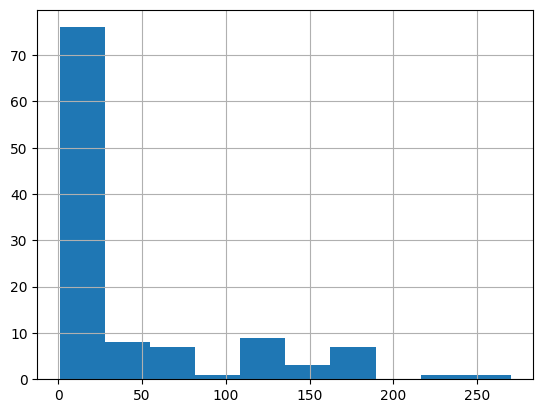

In [18]:
# First let's create a historgram that shows us how many unique items we per column in columns that have less than 10.000 unique items
df_non_nan_features.nunique()[df_non_nan_features.nunique() < 500].hist()

In [19]:
# These columns have more than 200 unique values
threshold = 200
skewed_columns = df_non_nan_features.columns[df_non_nan_features.nunique() > threshold]
non_skewed_columns = df_non_nan_features.columns[df_non_nan_features.nunique() <= threshold]

In [20]:
# Let's explore the data of the sparse columns
df_non_nan_features[skewed_columns].describe()

,pld_mean,pld_max,bytes_in,rev_pld_mean,dst_port,hdr_mean,src_port,rev_pld_max,bytes_out,pld_median,rev_pld_var,time_length
count,131065.000000,131065.000000,1.310650e+05,131065.000000,131065.000000,131065.000000,131065.000000,131065.000000,1.310650e+05,131065.000000,131065.000000,131065.000000
mean,36.952323,50.755404,7.083533e+02,28.795220,6295.408416,8.480633,54497.213383,45.942082,3.869601e+02,34.749590,7.573892,281.963707
std,85.824339,300.022115,1.871007e+04,141.641448,6500.330251,3.018802,11703.544553,401.047179,1.396429e+04,75.324697,99.635665,838.048354
min,0.000000,0.000000,0.000000e+00,0.000000,19.000000,8.000000,21.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000
25%,22.000000,22.000000,0.000000e+00,0.000000,5355.000000,8.000000,52193.000000,0.000000,4.400000e+01,22.000000,0.000000,0.410240
50%,22.000000,22.000000,0.000000e+00,0.000000,5355.000000,8.000000,56693.000000,0.000000,4.400000e+01,22.000000,0.000000,0.412771
75%,22.000000,22.000000,0.000000e+00,0.000000,5355.000000,8.000000,61014.000000,0.000000,8.800000e+01,22.000000,0.000000,0.421255
max,14220.700000,34788.000000,3.034629e+06,16765.910000,65191.000000,40.680000,65535.000000,33450.000000,2.701933e+06,13032.000000,13093.610000,5877.413115


Rendering chart 0 ...
Rendering chart 1 ...
Rendering chart 2 ...
Rendering chart 3 ...
Rendering chart 4 ...
Rendering chart 5 ...
Rendering chart 6 ...
Rendering chart 7 ...
Rendering chart 8 ...
Rendering chart 9 ...
Rendering chart 10 ...
Rendering chart 11 ...


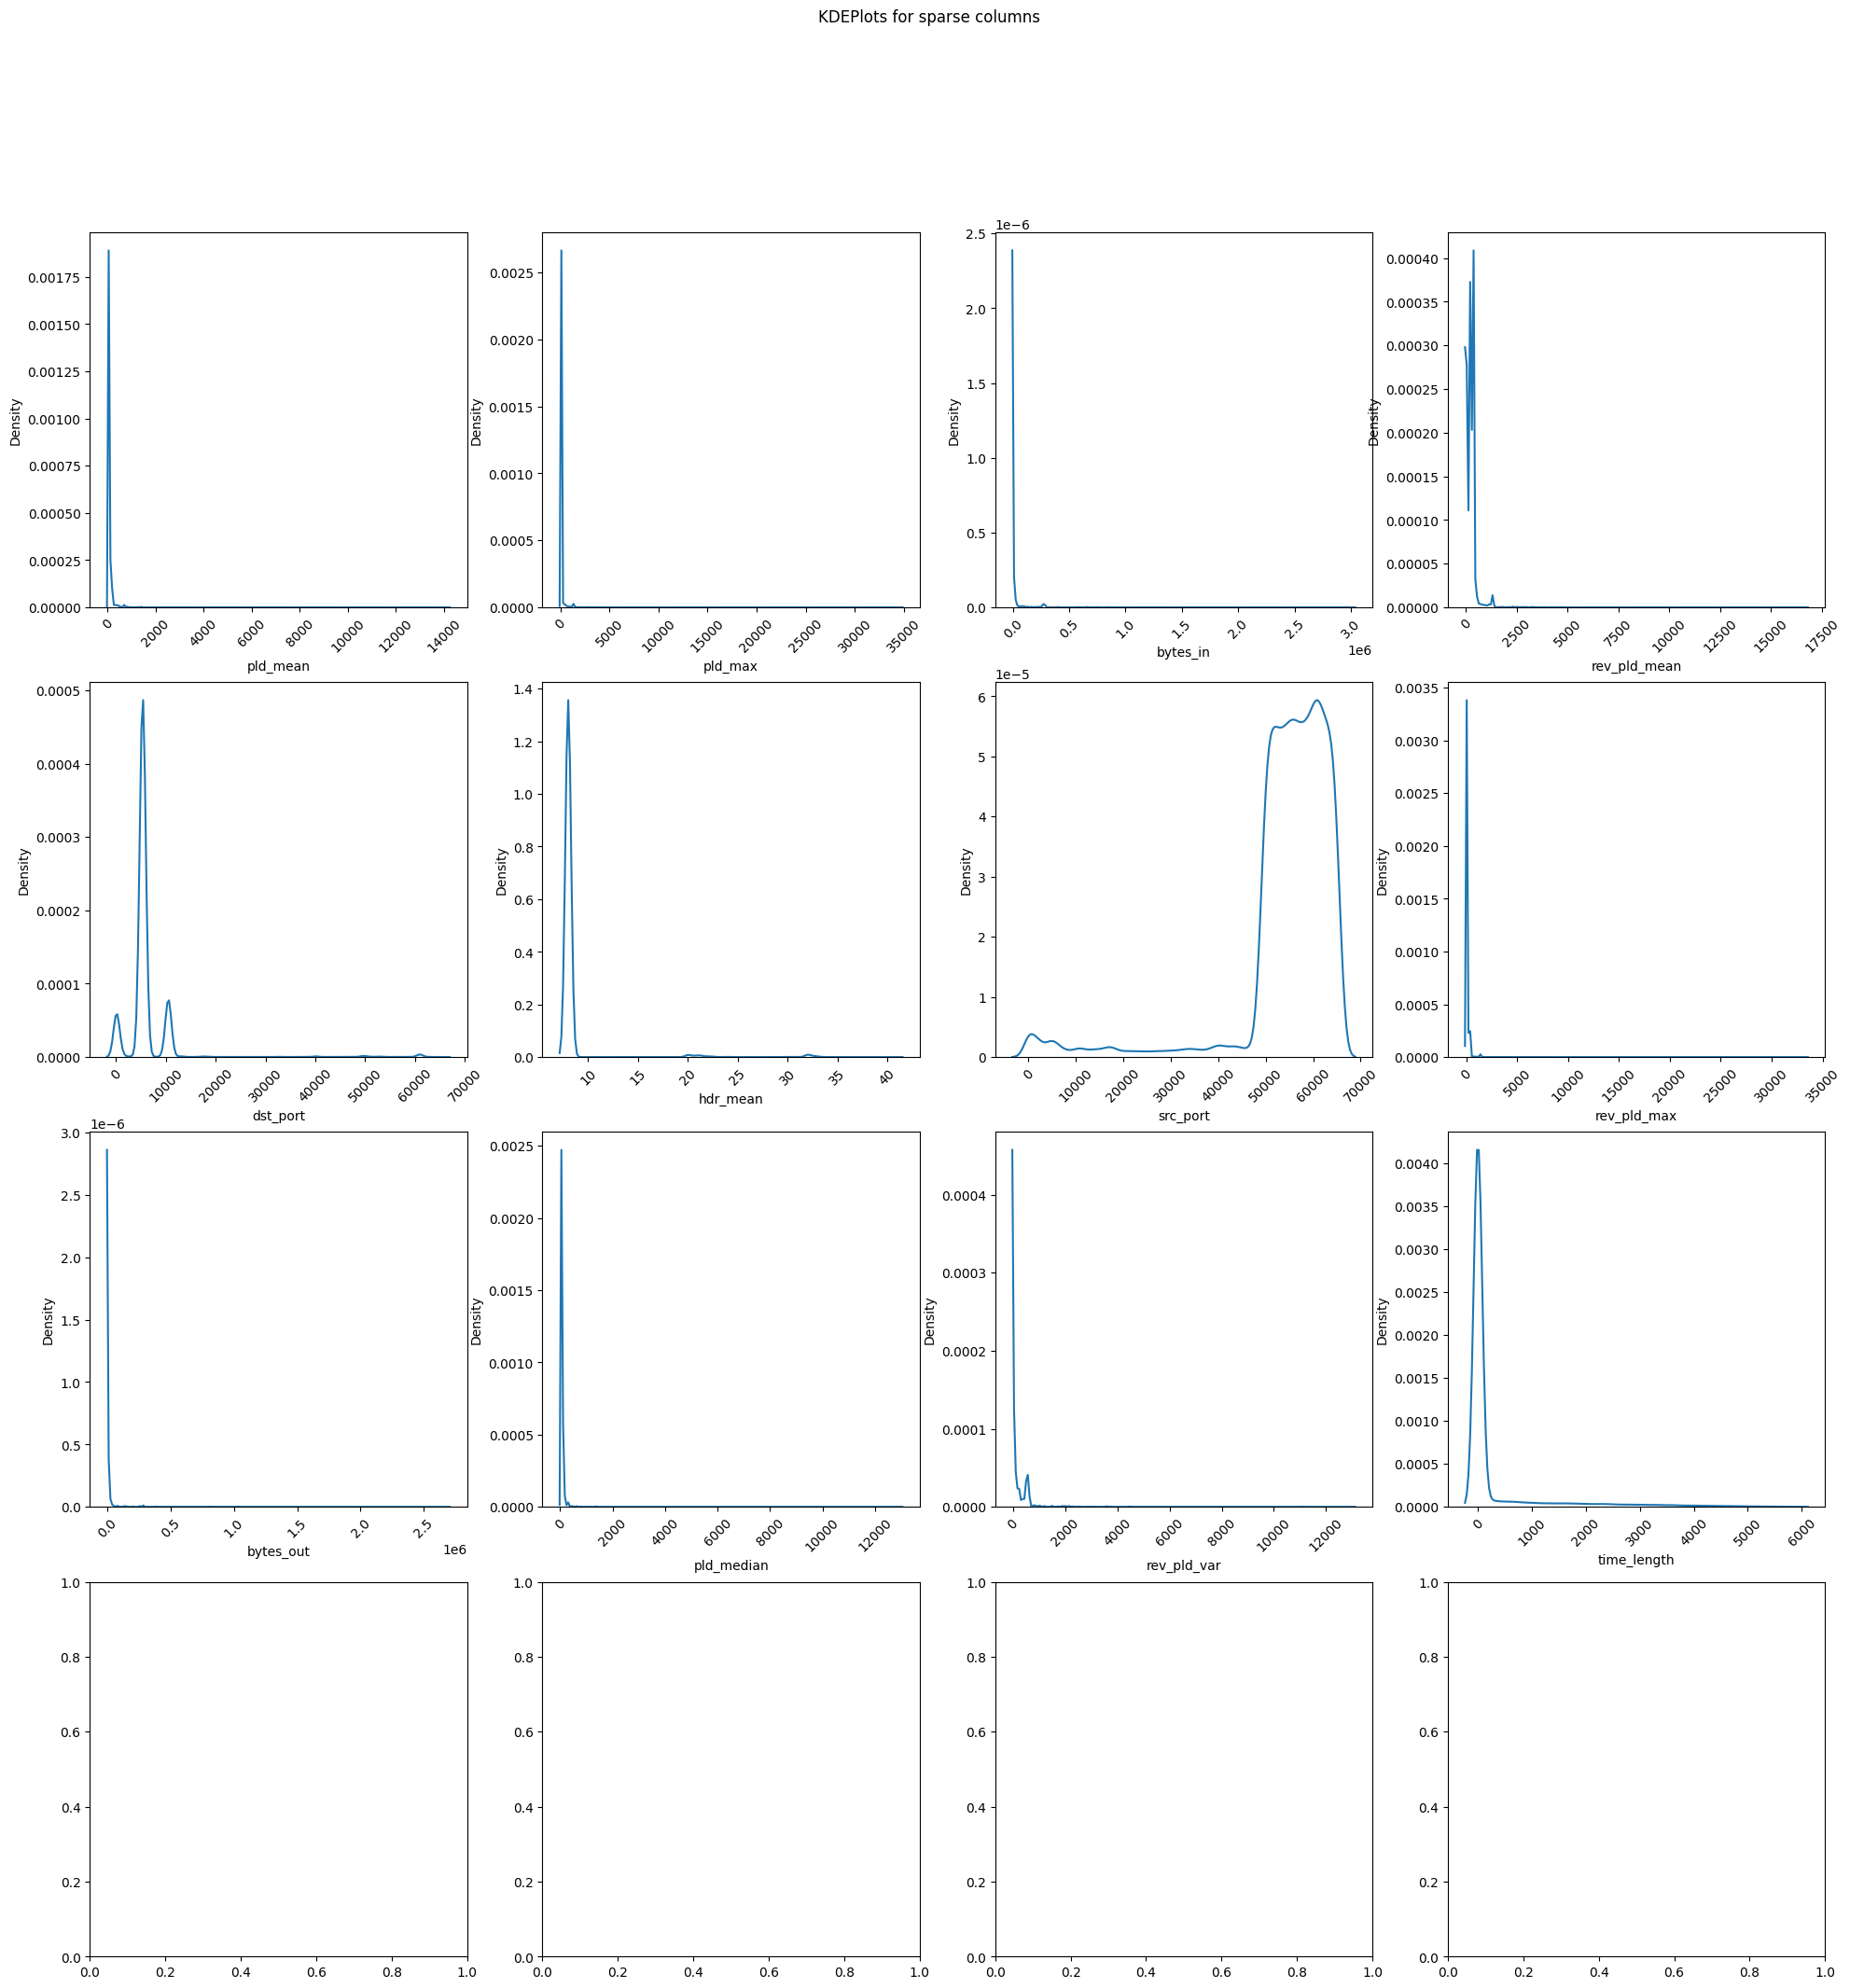

In [21]:
n_rows, n_columns = 4, 4
fig, ax = plt.subplots(n_rows, n_columns, figsize=(n_columns*6, n_rows*6))
fig.suptitle("KDEPlots for sparse columns")

for i, colname in enumerate(skewed_columns):
    print(f"Rendering chart {i} ...")
    ax[i // n_rows][i % n_columns].tick_params(axis='x', rotation=45)
    sns.kdeplot(ax=ax[i // n_rows][i % n_columns], data=df_non_nan_features, x=colname)

## Ports transformation

The ports column is simply divided by the possible number of ports (65535). This maps the port numbers to a range between 0 and 1. No information gets lost by this method because it is a linear transformation.

In [22]:
df_non_nan_features["src_port_scaled"] = df_non_nan_features["src_port"] / 65_535
df_non_nan_features["dst_port_scaled"] = df_non_nan_features["dst_port"] / 65_535
df_non_nan_features = df_non_nan_features.drop(["src_port", "dst_port"], axis=1)

/tmp/ipykernel_5127/2553006566.py:1: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_non_nan_features["src_port_scaled"] = df_non_nan_features["src_port"] / 65_535
/tmp/ipykernel_5127/2553006566.py:2: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_non_nan_features["dst_port_scaled"] = df_non_nan_features["dst_port"] / 65_535


## Log transformation of large values

In [23]:
log_transform_columns = ["rev_pld_max", "bytes_in", "time_length", "rev_pld_var", "pld_mean", "rev_pld_mean", "pld_median", "bytes_out", "pld_max"]
for colname in log_transform_columns:
    df_non_nan_features[f"{colname}_scaled"] = df_non_nan_features[colname].apply(lambda x: np.log(x + 1))
    df_non_nan_features = df_non_nan_features.drop([colname], axis=1)

/tmp/ipykernel_5127/3238031595.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_non_nan_features[f"{colname}_scaled"] = df_non_nan_features[colname].apply(lambda x: np.log(x + 1))
/tmp/ipykernel_5127/3238031595.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_non_nan_features[f"{colname}_scaled"] = df_non_nan_features[colname].apply(lambda x: np.log(x + 1))
/tmp/ipykernel_5127/3238031595.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which h

## Standard scaling

In [24]:
from sklearn.preprocessing import StandardScaler
std_scaling_columns = ["hdr_mean"]
scaler = StandardScaler()
rename_dict = {}

for colname in std_scaling_columns:
    df_non_nan_features[std_scaling_columns] = scaler.fit_transform(df_non_nan_features[std_scaling_columns])
    rename_dict |= {colname: f"{colname}_scaled"}

df_non_nan_features = df_non_nan_features.rename(columns=rename_dict)

Rendering chart 0 ...
Rendering chart 1 ...
Rendering chart 2 ...
Rendering chart 3 ...
Rendering chart 4 ...
Rendering chart 5 ...
Rendering chart 6 ...
Rendering chart 7 ...
Rendering chart 8 ...
Rendering chart 9 ...
Rendering chart 10 ...
Rendering chart 11 ...


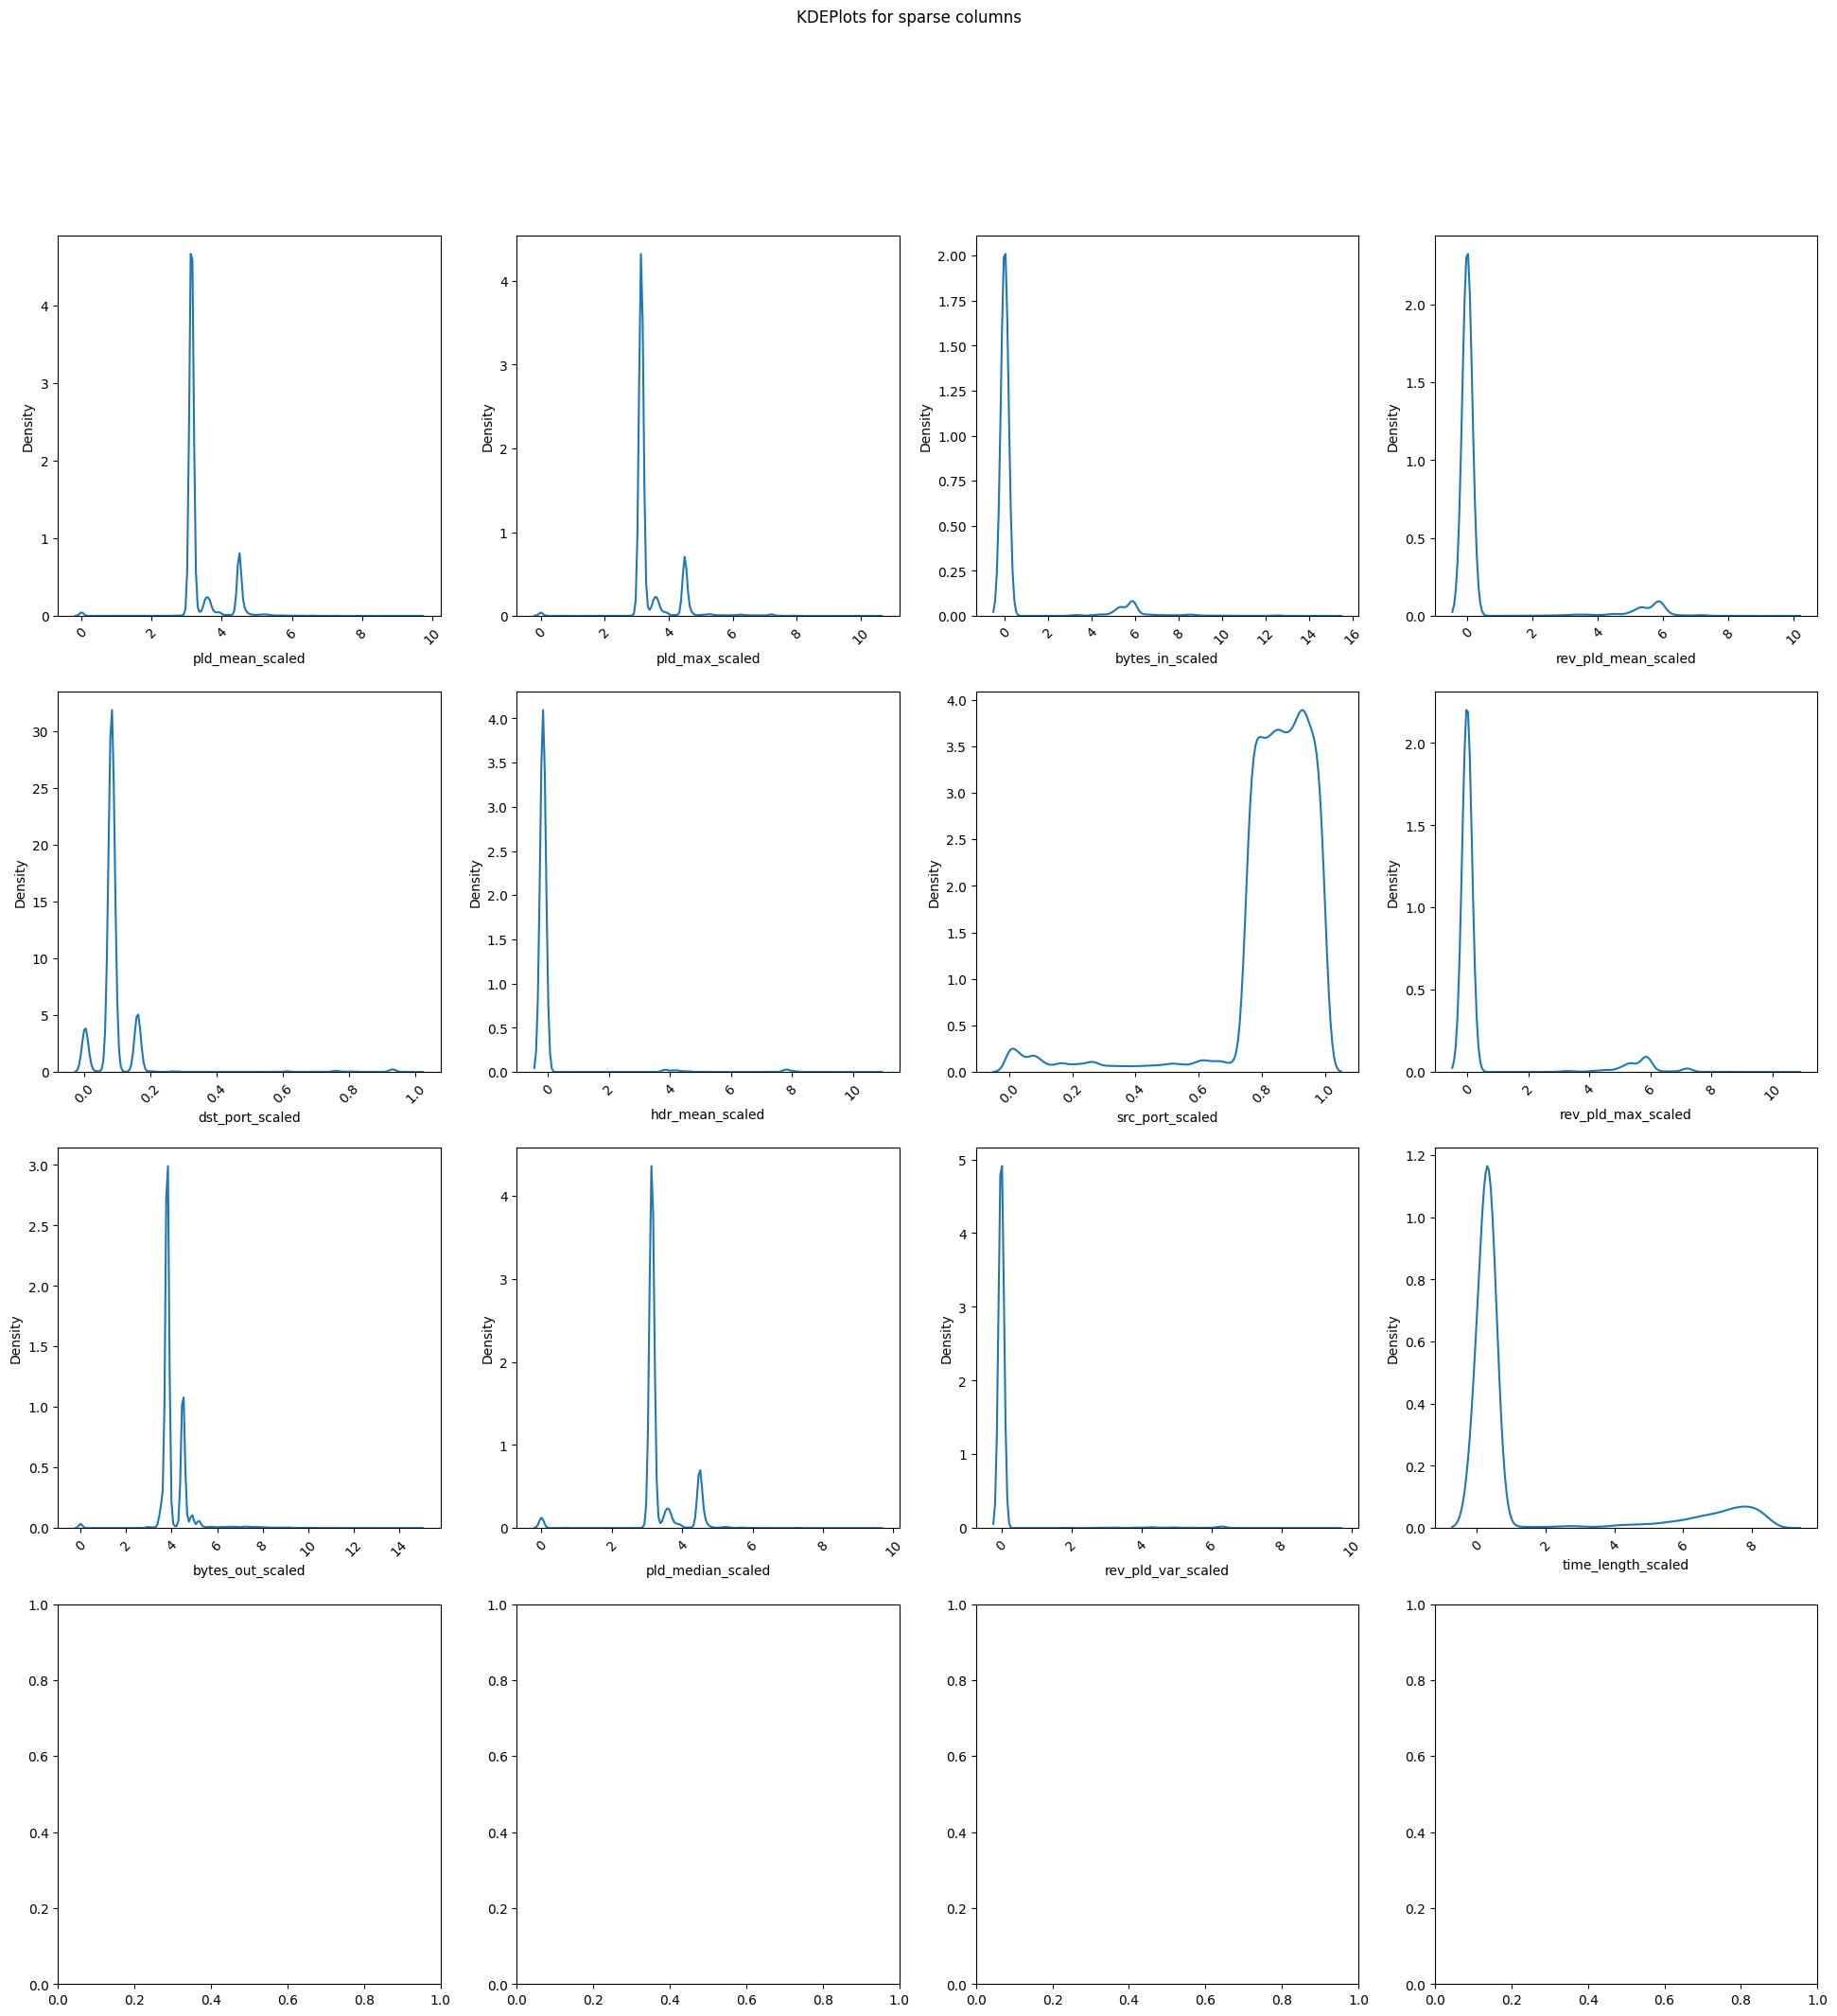

In [25]:
n_rows, n_columns = 4, 4
fig, ax = plt.subplots(n_rows, n_columns, figsize=(n_columns*6, n_rows*6))
fig.suptitle("KDEPlots for sparse columns")

for i, colname in enumerate(skewed_columns):
    print(f"Rendering chart {i} ...")
    ax[i // n_rows][i % n_columns].tick_params(axis='x', rotation=45)
    sns.kdeplot(ax=ax[i // n_rows][i % n_columns], data=df_non_nan_features, x=f"{colname}_scaled")

## Treating non-skewed columns

In [26]:
df_describe = df_non_nan_features[non_skewed_columns].describe()
df_describe

,hdr_distinct,rev_hdr_bin_40,rev_pld_distinct,num_pkts_in,pld_bin_inf,num_pkts_out,pr,hdr_bin_40,rev_pld_bin_128,pld_distinct,rev_hdr_distinct,rev_intervals_ccnt_0,rev_intervals_ccnt_1,rev_intervals_ccnt_2,rev_intervals_ccnt_3,rev_intervals_ccnt_4,rev_intervals_ccnt_5,rev_intervals_ccnt_6,rev_intervals_ccnt_7,rev_intervals_ccnt_8,rev_intervals_ccnt_9,rev_intervals_ccnt_10,rev_intervals_ccnt_11,rev_intervals_ccnt_12,rev_intervals_ccnt_13,rev_intervals_ccnt_14,rev_intervals_ccnt_15,pld_ccnt_0,pld_ccnt_1,pld_ccnt_2,pld_ccnt_3,pld_ccnt_4,pld_ccnt_5,pld_ccnt_6,pld_ccnt_7,pld_ccnt_8,pld_ccnt_9,pld_ccnt_10,pld_ccnt_11,pld_ccnt_12,pld_ccnt_13,pld_ccnt_14,pld_ccnt_15,rev_hdr_ccnt_0,rev_hdr_ccnt_1,rev_hdr_ccnt_2,rev_hdr_ccnt_3,rev_hdr_ccnt_4,rev_hdr_ccnt_5,rev_hdr_ccnt_6,rev_hdr_ccnt_7,rev_hdr_ccnt_8,rev_hdr_ccnt_9,rev_hdr_ccnt_10,rev_hdr_ccnt_11,rev_pld_ccnt_0,rev_pld_ccnt_1,rev_pld_ccnt_2,rev_pld_ccnt_3,rev_pld_ccnt_4,rev_pld_ccnt_5,rev_pld_ccnt_6,rev_pld_ccnt_7,rev_pld_ccnt_8,rev_pld_ccnt_9,rev_pld_ccnt_10,rev_pld_ccnt_11,rev_pld_ccnt_12,rev_pld_ccnt_13,rev_pld_ccnt_14,rev_pld_ccnt_15,rev_ack_psh_rst_syn_fin_cnt_0,rev_ack_psh_rst_syn_fin_cnt_1,rev_ack_psh_rst_syn_fin_cnt_2,rev_ack_psh_rst_syn_fin_cnt_3,rev_ack_psh_rst_syn_fin_cnt_4,ack_psh_rst_syn_fin_cnt_0,ack_psh_rst_syn_fin_cnt_1,ack_psh_rst_syn_fin_cnt_2,ack_psh_rst_syn_fin_cnt_3,ack_psh_rst_syn_fin_cnt_4,intervals_ccnt_0,intervals_ccnt_1,intervals_ccnt_2,intervals_ccnt_3,intervals_ccnt_4,intervals_ccnt_5,intervals_ccnt_6,intervals_ccnt_7,intervals_ccnt_8,intervals_ccnt_9,intervals_ccnt_10,intervals_ccnt_11,intervals_ccnt_12,intervals_ccnt_13,intervals_ccnt_14,intervals_ccnt_15,hdr_ccnt_0,hdr_ccnt_1,hdr_ccnt_2,hdr_ccnt_3,hdr_ccnt_4,hdr_ccnt_5,hdr_ccnt_6,hdr_ccnt_7,hdr_ccnt_8,hdr_ccnt_9,hdr_ccnt_10,hdr_ccnt_11
count,131065.000000,131065.000000,131065.000000,131065.000000,131065.000000,131065.000000,131065.000000,131065.000000,131065.000000,131065.000000,131065.000000,131065.000000,131065.000000,131065.000000,131065.000000,131065.000000,131065.000000,131065.000000,131065.000000,131065.000000,131065.000000,131065.000000,131065.000000,131065.000000,131065.000000,131065.000000,131065.000000,131065.000000,131065.000000,131065.000000,131065.000000,131065.000000,131065.000000,131065.000000,131065.000000,131065.000000,131065.000000,131065.000000,131065.000000,131065.000000,131065.000000,131065.000000,131065.000000,131065.000000,131065.000000,131065.000000,131065.000000,131065.000000,131065.000000,131065.000000,131065.000000,131065.0,131065.000000,131065.0,131065.000000,131065.000000,131065.000000,131065.000000,131065.000000,131065.000000,131065.000000,131065.000000,131065.000000,131065.000000,131065.000000,131065.000000,131065.000000,131065.000000,131065.000000,131065.000000,131065.000000,131065.000000,131065.000000,131065.000000,131065.000000,131065.000000,131065.000000,131065.000000,131065.000000,131065.000000,131065.000000,131065.000000,131065.000000,131065.000000,131065.000000,131065.000000,131065.000000,131065.000000,131065.000000,131065.000000,131065.000000,131065.000000,131065.000000,131065.000000,131065.000000,131065.000000,131065.000000,131065.000000,131065.000000,131065.000000,131065.000000,131065.000000,131065.000000,131065.000000,131065.000000,131065.000000,131065.000000,131065.000000,131065.000000
mean,1.018655,0.247366,0.244634,0.961241,0.097715,3.312768,16.699622,0.250349,0.446893,1.142326,0.122992,0.760577,0.009980,0.024530,0.005287,0.001938,0.002747,0.002915,0.008133,0.001083,0.001000,0.001129,0.019906,0.000984,0.000320,0.002213,0.014466,2.693396,0.332789,0.076512,0.033037,0.012749,0.007500,0.013551,0.012536,0.010201,0.003128,0.005005,0.003594,0.002991,0.002533,0.002030,0.100637,0.224904,0.481173,0.002922,0.000305,0.242162,0.000038,0.004860,0.000580,0.0,0.000175,0.0,0.001030,0.351383,0.094907,0.041163,0.027154,0.021867,0.040034,0.004578,0.005738,0.005554,0.002701,0.003853,0.002968,0.002609,0.002289,0.002411,0.348941,0.727044,0.197444,0.007805,0.017098,0.018418,0.621280,0.

## Treating numerical non-skewed columns

In [27]:
std_scaling_columns = []
rename_dict = {}

for colname in df_describe.columns:
    vmin = df_describe.loc["min", colname]
    vmax = df_describe.loc["max", colname]
    vrange = vmax - vmin
    # Columns that have a large range are log transformed
    if vrange > 1000:
        df_non_nan_features[f"{colname}_scaled"] = df_non_nan_features[colname].apply(lambda x: np.log(x + 1))
        df_non_nan_features = df_non_nan_features.drop([colname], axis=1)
    # Other columns are scaled using a standard scaler
    else:
        std_scaling_columns.append(colname)
        rename_dict |= {colname: f"{colname}_scaled"}

df_non_nan_features[std_scaling_columns] = scaler.fit_transform(df_non_nan_features[std_scaling_columns])    
df_non_nan_features = df_non_nan_features.rename(columns=rename_dict)

In [28]:
category_columns = [colname for colname in df_non_nan_features.columns if str(df_non_nan_features[colname].dtype) == "category"]
category_columns

['da_cat', 'sa_cat']

In [29]:
features_final = pd.get_dummies(df_non_nan_features, prefix='feature')

In [30]:
features_final

,hdr_distinct_scaled,rev_hdr_bin_40_scaled,rev_pld_distinct_scaled,num_pkts_in_scaled,pld_bin_inf_scaled,num_pkts_out_scaled,pr_scaled,hdr_bin_40_scaled,rev_pld_bin_128_scaled,hdr_mean_scaled,pld_distinct_scaled,rev_hdr_distinct_scaled,rev_intervals_ccnt_0_scaled,rev_intervals_ccnt_1_scaled,rev_intervals_ccnt_2_scaled,rev_intervals_ccnt_3_scaled,rev_intervals_ccnt_4_scaled,rev_intervals_ccnt_5_scaled,rev_intervals_ccnt_6_scaled,rev_intervals_ccnt_7_scaled,rev_intervals_ccnt_8_scaled,rev_intervals_ccnt_9_scaled,rev_intervals_ccnt_10_scaled,rev_intervals_ccnt_11_scaled,rev_intervals_ccnt_12_scaled,rev_intervals_ccnt_13_scaled,rev_intervals_ccnt_14_scaled,rev_intervals_ccnt_15_scaled,pld_ccnt_0_scaled,pld_ccnt_1_scaled,pld_ccnt_2_scaled,pld_ccnt_3_scaled,pld_ccnt_4_scaled,pld_ccnt_5_scaled,pld_ccnt_6_scaled,pld_ccnt_7_scaled,pld_ccnt_8_scaled,pld_ccnt_9_scaled,pld_ccnt_10_scaled,pld_ccnt_11_scaled,pld_ccnt_12_scaled,pld_ccnt_13_scaled,pld_ccnt_14_scaled,pld_ccnt_15_scaled,rev_hdr_ccnt_0_scaled,rev_hdr_ccnt_1_scaled,rev_hdr_ccnt_2_scaled,rev_hdr_ccnt_3_scaled,rev_hdr_ccnt_4_scaled,rev_hdr_ccnt_5_scaled,rev_hdr_ccnt_6_scaled,rev_hdr_ccnt_7_scaled,rev_hdr_ccnt_8_scaled,rev_hdr_ccnt_9_scaled,rev_hdr_ccnt_10_scaled,rev_hdr_ccnt_11_scaled,rev_pld_ccnt_0_scaled,rev_pld_ccnt_1_scaled,rev_pld_ccnt_2_scaled,rev_pld_ccnt_3_scaled,rev_pld_ccnt_4_scaled,rev_pld_ccnt_5_scaled,rev_pld_ccnt_6_scaled,rev_pld_ccnt_7_scaled,rev_pld_ccnt_8_scaled,rev_pld_ccnt_9_scaled,rev_pld_ccnt_10_scaled,rev_pld_ccnt_11_scaled,rev_pld_ccnt_12_scaled,rev_pld_ccnt_13_scaled,rev_pld_ccnt_14_scaled,rev_pld_ccnt_15_scaled,rev_ack_psh_rst_syn_fin_cnt_0_scaled,rev_ack_psh_rst_syn_fin_cnt_1_scaled,rev_ack_psh_rst_syn_fin_cnt_2_scaled,rev_ack_psh_rst_syn_fin_cnt_3_scaled,rev_ack_psh_rst_syn_fin_cnt_4_scaled,ack_psh_rst_syn_fin_cnt_0_scaled,ack_psh_rst_syn_fin_cnt_1_scaled,ack_psh_rst_syn_fin_cnt_2_scaled,ack_psh_rst_syn_fin_cnt_3_scaled,ack_psh_rst_syn_fin_cnt_4_scaled,intervals_ccnt_0_scaled,intervals_ccnt_1_scaled,intervals_ccnt_2_scaled,intervals_ccnt_3_scaled,intervals_ccnt_4_scaled,intervals_ccnt_5_scaled,intervals_ccnt_6_scaled,intervals_ccnt_7_scaled,intervals_ccnt_8_scaled,intervals_ccnt_9_scaled,intervals_ccnt_10_scaled,intervals_ccnt_11_scaled,intervals_ccnt_12_scaled,intervals_ccnt_13_scaled,intervals_ccnt_14_scaled,intervals_ccnt_15_scaled,hdr_ccnt_0_scaled,hdr_ccnt_1_scaled,hdr_ccnt_2_scaled,hdr_ccnt_3_scaled,hdr_ccnt_4_scaled,hdr_ccnt_5_scaled,hdr_ccnt_6_scaled,hdr_ccnt_7_scaled,hdr_ccnt_8_scaled,hdr_ccnt_9_scaled,hdr_ccnt_10_scaled,hdr_ccnt_11_scaled,src_port_scaled,dst_port_scaled,rev_pld_max_scaled,bytes_in_scaled,time_length_scaled,rev_pld_var_scaled,pld_mean_scaled,rev_pld_mean_scaled,pld_median_scaled,bytes_out_scaled,pld_max_scaled,feature_IP_masked,feature_IP_masked
id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
8128279,-0.132059,-0.048807,-0.135760,-0.090928,-0.027607,-0.110762,0.167552,-0.053277,-0.074329,-0.159214,-0.081926,-0.319147,-0.075631,-0.026984,-0.020902,-0.046795,-0.026604,-0.016631,-0.012144,-0.023956,-0.013299,-0.01127,-0.011743,-0.028361,-0.004992,-0.015505,-0.032996,-0.040035,-0.080615,-0.067397,-0.040929,-0.027285,-0.024327,-0.030438,-0.017816,-0.016192,-0.027624,-0.020565,-0.020083,-0.015586,-0.015383,-0.014969,-0.016059,-0.028164,-0.047742,-0.061099,-0.054137,-0.015324,-0.048028,-0.006177,-0.068808,-0.007243,0.0,-0.002762,0.0,-0.002762,-0.075263,-0.031331,-0.038042,-0.064183,-0.071429,-0.066946,-0.037557,-0.020592,-0.017799,-0.019165,-0.0166,-0.013925,-0.021065,-0.019813,-0.021759,-0.047210,-0.077204,-0.063827,-0.055772,-0.129675,-0.129104,-0.079870,-0.062842,-0.019642,-0.129961,-0.111413,-0.083460,-0.021177,-0.027423,-0.015077,-0.046439,-0.010545,-0.017936,-0.028313,-0.02621,-0.018523,-0.020174,-0.029955,-0.008843,-0.008794,-0.0379,-0.18807,-0.073805,-0.063820,-0.004784,-0.023607,-0.052071,-0.002762,-0.054987,-0.010897,-0.004604,-0.004381,-0.003882,-0.

In [31]:
# save features
features_final.to_pickle('features_final.pkl.gz', compression='gzip')

## Encoding labels

In [35]:
for colname in label_columns:
    label_df = df_all[[colname]]
    label_df[colname] = label_df[colname].astype("category")
    label_df = label_df.to_pickle(f"{colname}.pkl.gz", compression='gzip')
    label_df = pd.get_dummies(df_all[[colname]], prefix='label')
    label_df.to_pickle(f"{colname}_ohe.pkl.gz", compression='gzip')

/tmp/ipykernel_5127/136100868.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  label_df[colname] = label_df[colname].astype("category")
/tmp/ipykernel_5127/136100868.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  label_df[colname] = label_df[colname].astype("category")
/tmp/ipykernel_5127/136100868.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pan